# MNIST en Deep Learning

Dans ce TP, nous allons construire des algorithmes de Deep Learning pour tenter de reconnaître des chiffres manuscrits.

## Chargement des données et transformation

Nous allons travailler sur la base de données MNIST qui contient 60000 images en niveaux de grille de résolution 28x28, représentant les 10 chiffres de 0 à 9, ainsi qu'un jeu de test de 10000 images. Tout d'abord, chargeons ce jeu de données.

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras

(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


Visualisons quelques données.   

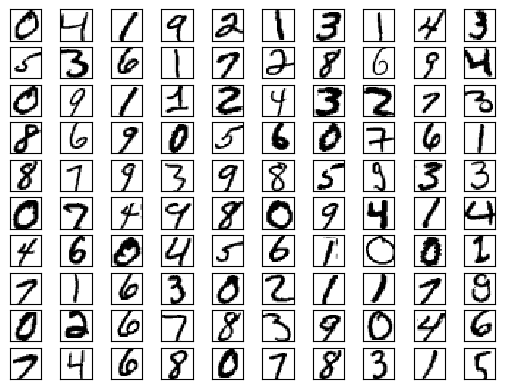

In [ ]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

Maintenant que nous avons chargé les données, nous allons modifier la dimension de matrices, afin de les mettre sous une forme qui pourra être traitée par nos réseaux de neurones.

In [ ]:
subset=10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train_base[:subset], nb_classes)
y_test = to_categorical(y_test_base, nb_classes)


Nous avons maintenant des vecteurs à la place des images.

In [ ]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(10000, 784)


## Construire un premier réseau de neurones

Construisons notre premier réseau de neurones.

Pour cela, nous allons créer un modèle Keras en utilisant l'api Sequential:
* __model = Sequential()__

Puis utiliser les méthodes suivantes de Keras pour ajouter des couches à ce modèle :

* __model.add(Dense(nbhiden, [input_shape=(nbinput,1)], [activation='activationfunction']))__ : ajoute une couche cachée au réseau de neurones. nbhidden est le nombre de neurones de la couche. [input_shape=(nbinput,)] correspond à la dimension de l'entrée, [activation='activationfunction'] est la fonction d'activation
* __model.add(Dropout(value))__ : applique un dropout à la couche, pour éviter le surapprentissage

In [ ]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(12,activation='sigmoid'))
model.add(Dense(12,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD

nb_classes = 10   # à définir selon votre problème

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12)             │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,706 (37.91 KB)

 Trainable params: 9,706 (37.91 KB)

 Non-trainable params: 0 (0.00 B)

Création du modèle séquentiel

Première couche cachée

**model.add(Dense(12, input_shape=(784,), activation='sigmoid')**)


•	12 neurones : c'est le nombre de neurones de la couche cachée. Assez faible, mais peut suffire pour des problèmes simples.

•	input_shape=(784,) : spécifie que l'entrée est un vecteur de 784 dimension 784 (par exemple des images 28×28 aplaties).  valeurs (chaque image aplatie). Cette information n'est nécessaire que pour la première couche.

•	Fonction d'activation sigmoid : produit des valeurs entre 0 et 1. Historiquement utilisée, mais aujourd'hui on préfère relu pour les couches cachées car elle évite le problème de disparition du gradient et accélère la convergence.


** Deuxième couche cachée**

**model.add(Dense(12, activation='sigmoid'))**
Une deuxième couche avec 12 neurones, toujours avec sigmoid. Cela donne un réseau de profondeur modeste.

**Dropout**

**model.add(Dropout(0.5))**
•	Dropout(0.5) : désactive aléatoirement 50% des neurones pendant l'entraînement à chaque itération. C'est une technique de régularisation très efficace pour réduire le surapprentissage. Ici, il est placé après la deuxième couche cachée. Il pourrait aussi être placé après la première.


**Couche de sortie**

**model.add(Dense(nb_classes, activation='softmax'))**

•	nb_classes : doit être défini avant (par exemple nb_classes = 10 pour MNIST/Fashion-MNIST). Cette couche donne une distribution de probabilité sur les classes.

•	Activation softmax : transforme les scores en probabilités (somme = 1). C'est la fonction standard pour la classification multi-classe.
** Optimiseur SGD**

**sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)**


•	lr=0.1 : taux d'apprentissage assez élevé (attention à la stabilité).

•	decay=1e-6 : réduit progressivement le taux d'apprentissage au fil des itérations (learning rate decay).

•	momentum=0.9 : accélère la descente de gradient en ajoutant une fraction de la mise à jour précédente.

•	nesterov=True : utilise la version Nesterov du momentum (souvent plus performante).

C'est un optimiseur SGD classique avec momentum. Pour beaucoup de problèmes, Adam est plus simple à régler et converge souvent plus vite, mais SGD bien paramétré peut donner d'excellents résultats.



**Compilation**

**model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)**

• loss='categorical_crossentropy' : adaptée aux sorties one-hot encoded.

• metrics=['accuracy'] : on suit la précision pendant l'entraînement.

• optimizer=sgd : l'optimiseur défini précédemment

Ensuite, nous allons lancer l'apprentissage des paramètres.

In [ ]:
batch_size = 256
epochs=20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1069 - loss: 2.3942 - val_accuracy: 0.2081 - val_loss: 2.2447
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1788 - loss: 2.2243 - val_accuracy: 0.3900 - val_loss: 1.9949
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2550 - loss: 1.9733 - val_accuracy: 0.4437 - val_loss: 1.6329
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3111 - loss: 1.7362 - val_accuracy: 0.4828 - val_loss: 1.4608
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3666 - loss: 1.6050 - val_accuracy: 0.5387 - val_loss: 1.3451
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4150 - loss: 1.4879 - val_accuracy: 0.6480 - val_loss: 1.2321
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4602 - loss: 1.4082 - val_accuracy: 0.7047 - val_loss: 1.1284
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4856 - loss: 1.3436 - val_accuracy: 0.7355 - val_loss

Nous vous laissons analyser les résultats. Ce réseau de neurones est-il performant ?

__A vous de jouer__ : essayez de créer un meilleur réseau de neurones, afin d'atteindre le meilleur résultat possible.

In [ ]:
# Créer un meilleur réseau de neurones, et l'entraîner
# Objectif : avoir le meilleur résultat possible

# Nous ne donnons pas la correction. Il y a plusieurs réponses possibles.
# Vous pouvez par exemple ajouter des couches, modifier le nombre de neurones par couche et jouer sur le dropout.

Voyons ce que donne notre modèle sur un exemple.

The accuracy on the test set is  86.22000217437744 %


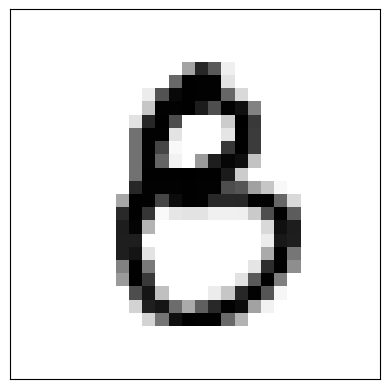

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
le chiffre reconnu est:  8
le chiffre à reconnaitre est:  8


In [ ]:
def plot_mnist_digit(image):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

loss, acc = model.evaluate(X_test, y_test, verbose=0)
index = 800
print('The accuracy on the test set is ', (acc*100), '%')
plot_mnist_digit(X_test_base[index])

# Nouvelle façon de prédire
probabilities = model.predict(X_test[index].reshape((1, 784)))  # (1) obtenir les probabilités
cl = np.argmax(probabilities, axis=1)[0]                         # (2) extraire la classe

print("le chiffre reconnu est: ", cl)
print("le chiffre à reconnaitre est: ", np.argmax(y_test[index]))


## CNN : réseaux de neurones convolutionnels

Nous allons maintenant implémenter un réseau de neurones convolutionnel.

Pour cet exercice, vous allez avoir besoin des méthodes Keras suivantes, en plus de celles déjà vues précédemment :

* __model.add(Conv2D(filters, kernel_size=(size, size), [activation='activation_function'], [input_shape=input_shape]))__ : ajoute une couche de convolution au réseau de neurones. filters est le nombre de filtres de convolution. kernel_size est la taille des filtres de convolution.
* __model.add(MaxPooling2D(pool_size=(psize, psize)))__ : ajoute une couche de max pooling. pool_size est la taille de la fenêtre de pooling.

In [ ]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)


In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

In [ ]:
batch_size = 256
epochs=20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

In [ ]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(x_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(x_test[index].reshape((1,28,28,1)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))


In [ ]:
# Créer un meilleur réseau de neurones convolutionnel, et l'entraîner
# Objectif : avoir le meilleur résultat possible

# Nous ne donnons pas la correction. Il y a plusieurs réponses possibles.
# Vous pouvez par exemple ajouter des couches convolutionnelles et max_pooling,
# modifier le nombre de convolutions ou leur taille et jouer sur le dropout.

## Bonus : Auto encodeur

L'auto-encodeur est un réseau de neurones qui compresse puis décompresse l'information. On l'entraîne en lui demandant de retrouver en sortie la même image que celle qu'il avait en entrée. Ici, l'information en entrée est en dimension 784 (28x28), et l'auto-encodeur va la compresser en dimension 2.

In [ ]:
encoding_dim = 2

model = Sequential()
model.add(Dense(encoding_dim, input_shape=(784,),activation='relu'))

model.add(Dense(784, activation='sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',  optimizer=sgd)

model.summary()


In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
subset=50000 #size
X_train = X_train[:subset].reshape(subset, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [ ]:
model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

In [ ]:
decoded_imgs = model.predict(X_test)

Affichons quelques images pour voir comment se comporte notre auto-encodeur.

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

__A vous de jouer__ : essayez d'améliorer l'auto-encodeur.

In [ ]:
## A COMPLETER

# Nous ne donnons pas la correction. Il y a plusieurs réponses possibles.
# Vous pouvez par exemple ajouter des couches ou modifier le nombre de neurones de la couche cachée.